In [4]:
install.packages("rpart")
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)
install.packages("ggplot2")
library(ggplot2)
install.packages("dplyr")
library(dplyr)
install.packages("tidyr")
library(tidyr)
install.packages("corrplot")
library(corrplot)
install.packages("caTools")
library(caTools)
install.packages("randomForest")
library(randomForest)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
corrplot 0.84 loaded
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    

In [7]:
#importing csv file
df <- read.csv('loan.csv')

#examining the dataset
str(df)
summary(df)

'data.frame':	39717 obs. of  111 variables:
 $ id                            : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ member_id                     : int  1296599 1314167 1313524 1277178 1311748 1311441 1304742 1288686 1306957 1306721 ...
 $ loan_amnt                     : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt                   : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv               : num  4975 2500 2400 10000 3000 ...
 $ term                          : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 1 2 1 2 1 2 2 ...
 $ int_rate                      : Factor w/ 371 levels "10.00%","10.01%",..: 18 159 176 100 75 339 176 240 287 75 ...
 $ installment                   : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 3 2 1 3 5 6 2 ...
 $ sub_grade                     : Factor w/ 35 levels 

       id            member_id         loan_amnt      funded_amnt   
 Min.   :  54734   Min.   :  70699   Min.   :  500   Min.   :  500  
 1st Qu.: 516221   1st Qu.: 666780   1st Qu.: 5500   1st Qu.: 5400  
 Median : 665665   Median : 850812   Median :10000   Median : 9600  
 Mean   : 683132   Mean   : 850464   Mean   :11219   Mean   :10948  
 3rd Qu.: 837755   3rd Qu.:1047339   3rd Qu.:15000   3rd Qu.:15000  
 Max.   :1077501   Max.   :1314167   Max.   :35000   Max.   :35000  
                                                                    
 funded_amnt_inv         term          int_rate      installment      grade    
 Min.   :    0    36 months:29096   10.99% :  956   Min.   :  15.69   A:10085  
 1st Qu.: 5000    60 months:10621   13.49% :  826   1st Qu.: 167.02   B:12020  
 Median : 8975                      11.49% :  825   Median : 280.22   C: 8098  
 Mean   :10397                      7.51%  :  787   Mean   : 324.56   D: 5307  
 3rd Qu.:14400                      7.88%  :  72

In [9]:
#selecting first 2000 rows
df <- df[1:2000,]

#replacing NA with 0
df[is.na(df)] <- 0

#selecting necessary attributes
df <- select(df, 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'application_type','pub_rec_bankruptcies')

#converting listed columns to category type
df$loan_status <- as.factor(df$loan_status)
df$term  <-as.factor(df$term)
df$grade <-as.factor(df$grade)
df$sub_grade <-as.factor(df$sub_grade)
df$emp_length <-as.factor(df$emp_length)
df$home_ownership <-as.factor(df$home_ownership)
df$verification_status <-as.factor(df$verification_status)
df$initial_list_status <-as.factor(df$initial_list_status)
df$application_type <-as.factor(df$application_type)


In [10]:
#converting listed columns to numeric type
df$mths_since_last_record <- as.numeric(df$mths_since_last_record)
df$mths_since_last_delinq <- as.numeric(df$mths_since_last_delinq)
df$int_rate <- as.numeric(df$int_rate)
df$revol_util <- as.numeric(df$revol_util)

In [11]:
#structure of cleaned dataset
str(df)
#summary of cleaned dataset
summary(df)

'data.frame':	2000 obs. of  38 variables:
 $ id                     : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ member_id              : int  1296599 1314167 1313524 1277178 1311748 1311441 1304742 1288686 1306957 1306721 ...
 $ loan_amnt              : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt            : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv        : num  4975 2500 2400 10000 3000 ...
 $ term                   : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 1 2 1 2 1 2 2 ...
 $ int_rate               : num  18 159 176 100 75 339 176 240 287 75 ...
 $ installment            : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                  : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 3 2 1 3 5 6 2 ...
 $ sub_grade              : Factor w/ 35 levels "A1","A2","A3",..: 7 14 15 11 10 4 15 21 27 10 ...
 $ emp_length             : Factor w/ 12 levels "< 1 year",

       id            member_id         loan_amnt      funded_amnt   
 Min.   : 623231   Min.   : 798733   Min.   : 1000   Min.   : 1000  
 1st Qu.:1047929   1st Qu.:1278714   1st Qu.: 7000   1st Qu.: 7000  
 Median :1055694   Median :1286985   Median :11838   Median :11150  
 Mean   :1053229   Mean   :1284223   Mean   :12887   Mean   :12576  
 3rd Qu.:1061871   3rd Qu.:1293459   3rd Qu.:17481   3rd Qu.:16500  
 Max.   :1077501   Max.   :1314167   Max.   :35000   Max.   :35000  
                                                                    
 funded_amnt_inv         term         int_rate      installment      grade  
 Min.   : 1000    36 months:1397   Min.   : 18.0   Min.   :  32.58   A:425  
 1st Qu.: 7000    60 months: 603   1st Qu.: 75.0   1st Qu.: 210.62   B:676  
 Median :11100                     Median :186.0   Median : 336.25   C:423  
 Mean   :12539                     Mean   :189.9   Mean   : 370.97   D:267  
 3rd Qu.:16444                     3rd Qu.:315.0   3rd Qu.: 483

In [25]:
#Finding correlation between variables
# Grab only numeric columns
num.cols <- sapply(df, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(df[,num.cols])

cor.data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,⋯,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000000,0.9250074026,-0.013598679,-0.01970542,-0.020521154,-0.002322061,-0.0023913778,-0.04733473,0.008253007,-0.020902932,⋯,-0.0134540838,-0.02115799,-0.02258487,-0.016808461,-0.015133812,0.011429925,-0.031115575,-0.018249803,-0.013320526,0.000156490
member_id,0.925007403,1.0000000000,-0.012010030,-0.01747145,-0.018218322,-0.016431074,0.0004448215,-0.04640424,-0.002619981,-0.033697375,⋯,-0.0093766162,-0.01985832,-0.02107476,-0.017445600,-0.011122045,0.011942640,-0.026276576,-0.016357430,-0.019626976,0.002211637
loan_amnt,-0.013598679,-0.0120100300,1.000000000,0.97704296,0.975674971,0.026910325,0.9179055098,0.42128894,0.024658685,-0.030179795,⋯,0.2683670758,0.87067901,0.86943479,0.806818172,0.715343538,0.064122695,0.175199089,0.138149455,0.440593232,-0.040801204
funded_amnt,-0.019705421,-0.0174714498,0.977042963,1.00000000,0.999240015,0.028654244,0.9523250462,0.41325231,0.018568954,-0.038812887,⋯,0.2609074347,0.89129144,0.89088185,0.833155632,0.714891706,0.062631186,0.178519020,0.139235613,0.444456505,-0.050403087
funded_amnt_inv,-0.020521154,-0.0182183220,0.975674971,0.99924001,1.000000000,0.029478297,0.9528342380,0.41306827,0.017648638,-0.038517446,⋯,0.2606734180,0.89073021,0.89163016,0.833452849,0.712442351,0.060571794,0.178395703,0.138875856,0.444775451,-0.050187272
int_rate,-0.002322061,-0.0164310739,0.026910325,0.02865424,0.029478297,1.000000000,0.0415862616,0.03582025,-0.047354144,-0.020433200,⋯,-0.0256307405,0.02250930,0.02284419,0.027465028,-0.004054784,-0.010086310,0.023511686,0.025044916,0.023358308,-0.014339688
installment,-0.002391378,0.0004448215,0.917905510,0.95232505,0.952834238,0.041586262,1.0000000000,0.40884714,0.011240843,-0.035484359,⋯,0.1472646456,0.84956836,0.85101739,0.828262739,0.605794336,0.056852370,0.147569326,0.112556907,0.395218224,-0.048193693
annual_inc,-0.047334734,-0.0464042437,0.421288937,0.41325231,0.413068273,0.035820250,0.4088471423,1.00000000,-0.226773141,0.047225365,⋯,0.0711909840,0.37387021,0.37363212,0.371001938,0.258991878,0.061307022,0.040267260,0.031368862,0.196210600,-0.025455583
dti,0.008253007,-0.0026199814,0.024658685,0.01856895,0.017648638,-0.047354144,0.0112408426,-0.22677314,1.000000000,-0.057370713,⋯,0.0157998452,0.02101423,0.01981727,0.002087440,0.056992661,-0.032029057,0.012487684,0.013523367,0.005639480,-0.049067653
delinq_2yrs,-0.020902932,-0.0336973752,-0.030179795,-0.03881289,-0.038517446,-0.020433200,-0.0354843588,0.04722537,-0.057370713,1.000000000,⋯,0.0142497378,-0.03837809,-0.03846274,-0.064756983,0.018443122,0.056885982,0.054781713,0.072895302,-0.029686383,-0.004778068


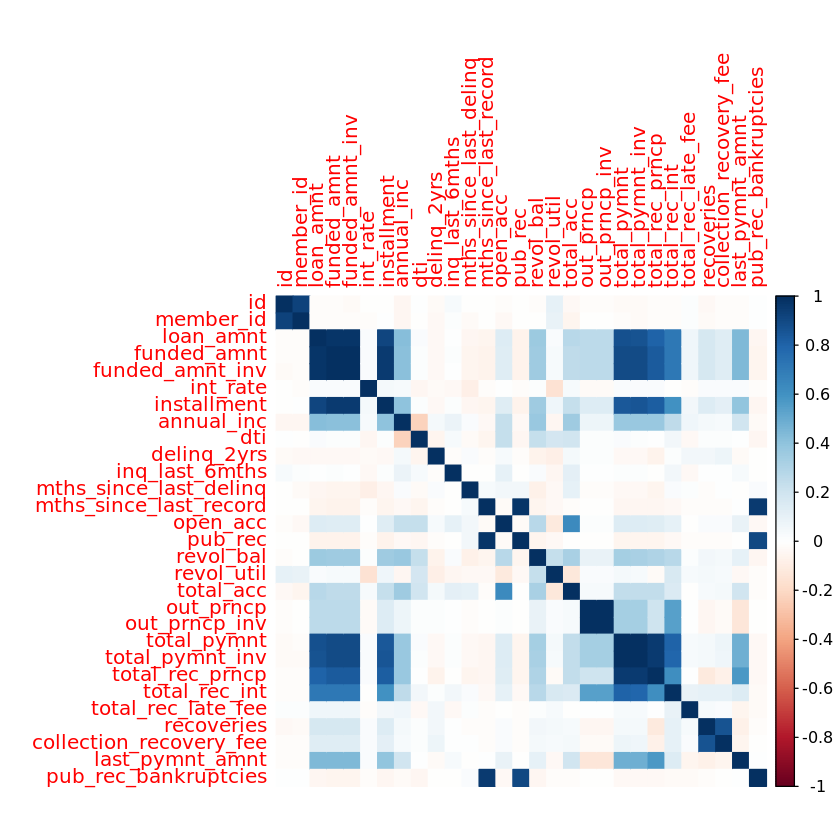

In [24]:
#visualising correlation
corrplot(cor.data,method='color')

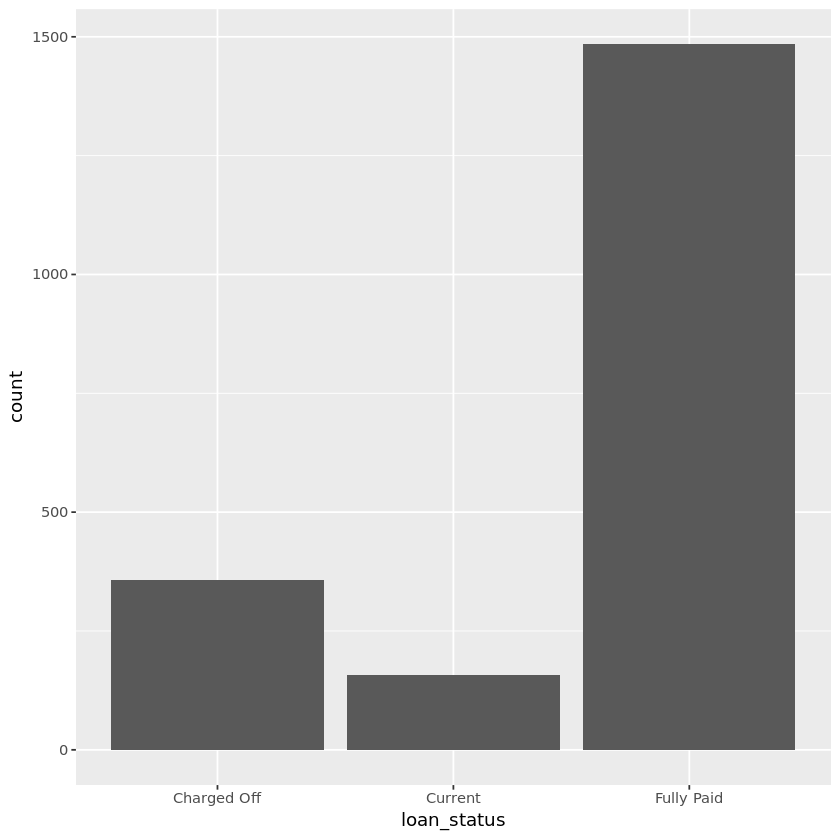

In [15]:
ggplot(df,aes(loan_status)) + geom_bar()

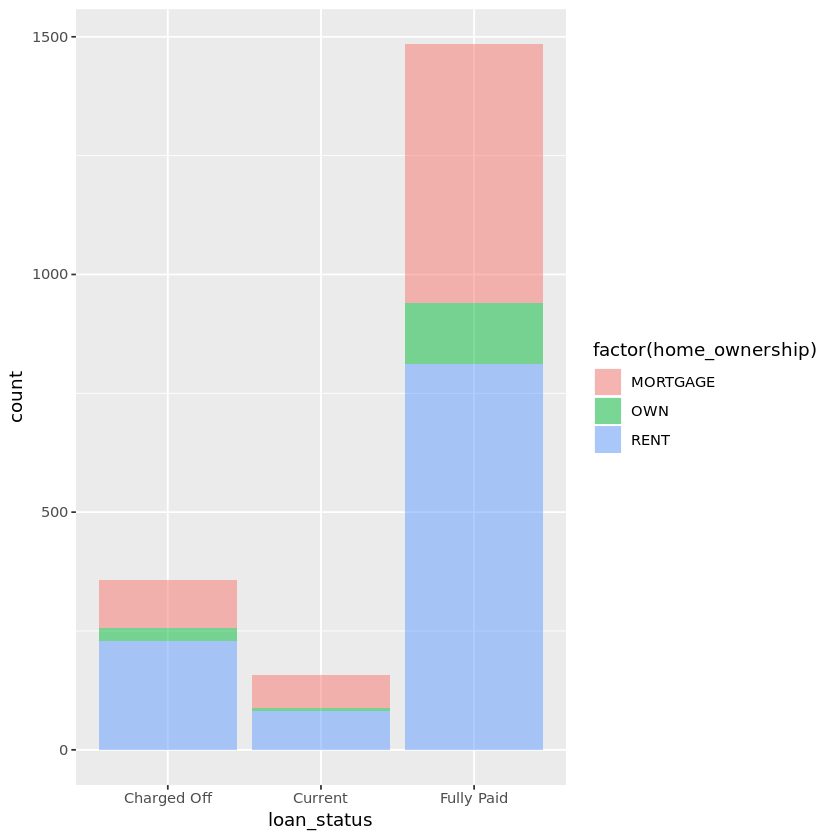

In [16]:
ggplot(df,aes(loan_status)) + geom_bar(aes(fill=factor(home_ownership)),alpha=0.5)

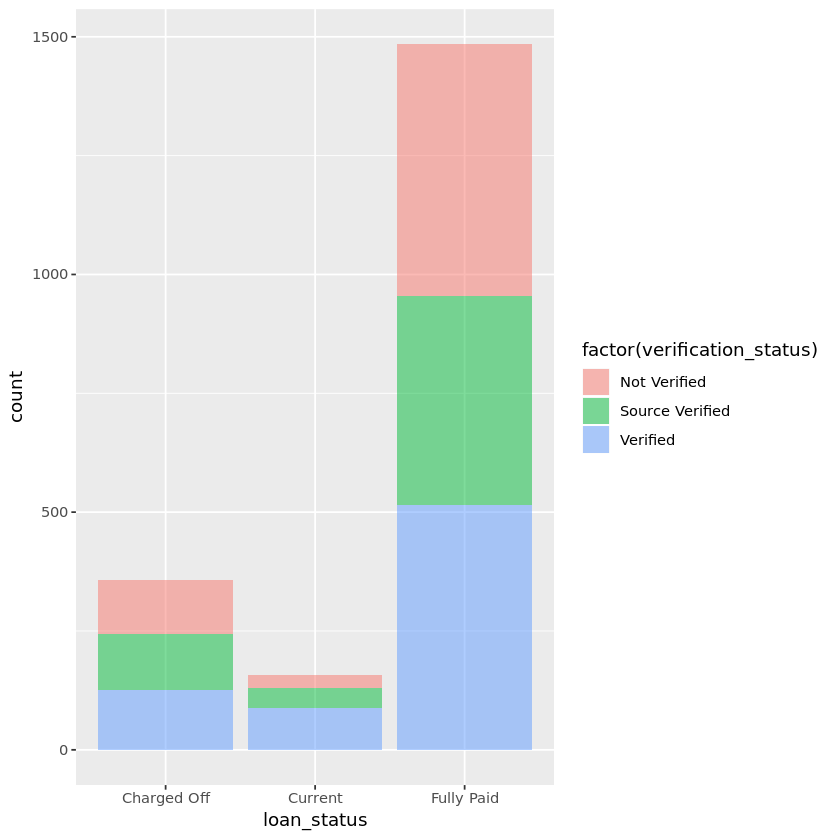

In [17]:
ggplot(df,aes(loan_status)) + geom_bar(aes(fill=factor(verification_status)),alpha=0.5)

In [10]:
#splitting dataset into training and testing data 
sample <- sample.split(df$loan_status, SplitRatio = 0.7)
train <- subset(df, sample == TRUE)
test <- subset(df, sample == FALSE)

In [26]:
#creating model using RandomForest
model <- randomForest(loan_status ~ .,   data=train)
print(model)



Call:
 randomForest(formula = loan_status ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 1.36%
Confusion matrix:
            Charged Off Current Fully Paid class.error
Charged Off         233       0         18 0.071713147
Current               0     110          1 0.009009009
Fully Paid            0       0       1039 0.000000000


In [20]:
#listing attributes which affect the target variable 
importance(model)

,MeanDecreaseGini
id,1.8283587
member_id,2.0224696
loan_amnt,10.7568391
funded_amnt,10.2250034
funded_amnt_inv,10.9884590
term,17.7622744
int_rate,2.0481899
installment,10.1576168
grade,3.3875480
sub_grade,6.1971836


In [15]:
#testing the model
forest.pred <- predict(model, test)
head(forest.pred)

#accuracy of the model
forest.perf <- table(test$loan_status, forest.pred, dnn = c('Actual','Predicted'))
print(forest.perf)

2           6          13          14          17          19 
Charged Off  Fully Paid Charged Off  Fully Paid  Fully Paid  Fully Paid 
Levels: Charged Off Current Fully Paid

             Predicted
Actual        Charged Off Current Fully Paid
  Charged Off         101       0          6
  Current               0      47          0
  Fully Paid            0       0        445
